Dataset: Salaries of jobs in the Data Science domain

Kaggle:https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

# 1- Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize']=12,5

# Reading Data

In [34]:
df=pd.read_csv("ds_salaries.csv")

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.shape

(607, 12)

# Features Description	

Dataset consists of 11 features.

1-work_year: The year the salary was paid.

2-experience_level: The experience level in the job during the year with the following possible values: 

(EN) Entry-level / Junior     

(MI) Mid-level / Intermediate 

(SE) Senior-level / Expert 

(EX) Executive-level / Director


3-employment_type: The type of employement for the role: 

(PT) Part-time 

(FT) Full-time 

(CT) Contract 

(FL) Freelance


4-job_title: The role worked in during the year.

5-salary: The total gross salary amount paid.

6-salary_currency: The currency of the salary paid as an ISO 4217 currency code.

7-salary_in_usd: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

8-employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.

9-remote_ratio: The overall amount of work done remotely, possible values are as follows: 

(0) No remote work (less than 20%) 

(50) Partially remote 

(100) Fully remote (more than 80%)


10-company_location:The country of the employer's main office or contracting branch as an ISO 3166 country code.

11-company_size: The average number of people that worked for the company during the year: 

(S) less than 50 employees (small) 

(M) 50  to 250 employees (medium)

(L) more than 250 employees (large)

# Exploring Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
df.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

The data doesn't cotain any Null values

In [7]:
df.work_year=df.work_year.astype("category")
df.experience_level=df.experience_level.astype("category")
df.employment_type=df.employment_type.astype("category")
df.job_title=df.job_title.astype("category")
df.salary_currency =df.salary_currency.astype("category")
df.employee_residence=df.employee_residence.astype("category")
df.company_location=df.company_location.astype("category")
df.company_size =df.company_size.astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Unnamed: 0          607 non-null    int64   
 1   work_year           607 non-null    category
 2   experience_level    607 non-null    category
 3   employment_type     607 non-null    category
 4   job_title           607 non-null    category
 5   salary              607 non-null    int64   
 6   salary_currency     607 non-null    category
 7   salary_in_usd       607 non-null    int64   
 8   employee_residence  607 non-null    category
 9   remote_ratio        607 non-null    int64   
 10  company_location    607 non-null    category
 11  company_size        607 non-null    category
dtypes: category(8), int64(4)
memory usage: 32.6 KB


In this process, I changed data type of the work_year column from integer to category, because years can't be calculated. Also, I did the same for other columns with obeject data type.

In [8]:
df=df.drop("Unnamed: 0",axis=1)

I droped (Unnamed: 0) column, because the data is alredy has index and to avoid duplicate data

In [9]:
df.describe()

,salary,salary_in_usd,remote_ratio
count,6.070000e+02,607.000000,607.00000
mean,3.240001e+05,112297.869852,70.92257
std,1.544357e+06,70957.259411,40.70913
min,4.000000e+03,2859.000000,0.00000
25%,7.000000e+04,62726.000000,50.00000
50%,1.150000e+05,101570.000000,100.00000
75%,1.650000e+05,150000.000000,100.00000
max,3.040000e+07,600000.000000,100.00000


Salary column is not reasonable since it contains different carrancies, so I will drop it.

Average salary_in_usd has an average of 112,297 per year, and 50% has salary of 101,570. Median is almost equal to the mean, which is normaly distributed. 

remote_ratioseem column seems reasonable


In [10]:
df=df.drop("salary",axis=1)
df=df.drop("salary_currency",axis=1)

In [11]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S


In [12]:
df["experience_level"].replace(["EN", "MI", "SE", "EX"], ["Junior", "Mid", "Senior", "Expert"], inplace=True)
df["remote_ratio"].replace([0, 50, 100], ["On-site", "Hybrid", "Remote"], inplace=True)
df["employment_type"].replace(["PT", "FT", "CT", "FL"], ["Part-time", "Full-time", "Contract", "Freelance"], inplace=True)
df["company_size"].replace(["S", "M", "L"], ["Small", "Medium", "Large"], inplace=True)

# Data Visualization

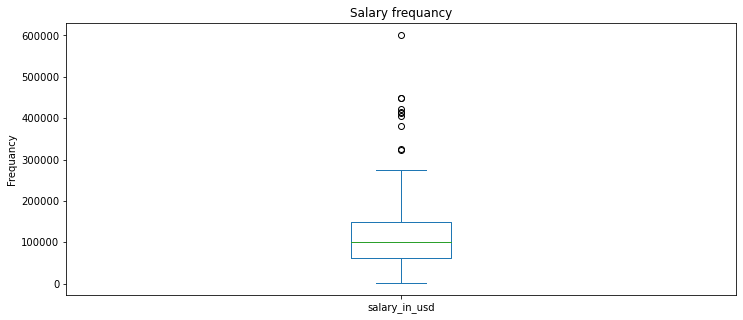

In [13]:
df["salary_in_usd"].plot(kind="box")
plt.ylabel("Frequancy")
plt.title("Salary frequancy")
plt.show()

Boxplots shows a Normal Distribution in salary,and it shows that there is an outliers 

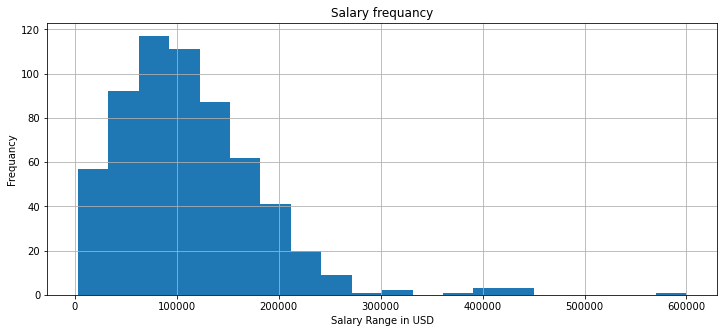

In [14]:
df["salary_in_usd"].hist(bins=20)
plt.xlabel("Salary Range in USD")
plt.ylabel("Frequancy")
plt.title("Salary frequancy")
plt.show()

The Histogram shows that the salry data is normaly distributed, and the mean salary range between 100,000 and 112,000 USD

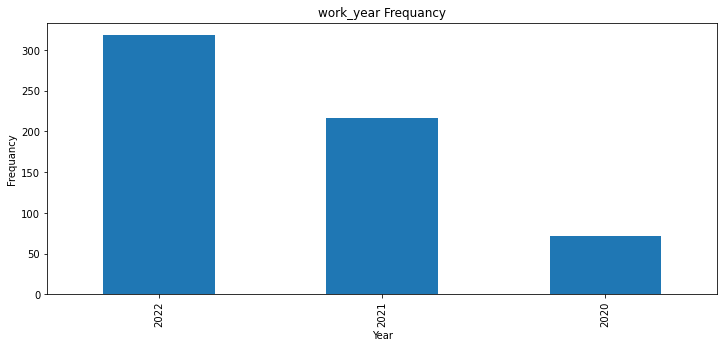

In [15]:
work_year_plot=df["work_year"].value_counts().plot(kind="bar")
work_year_plot
plt.xlabel("Year")
plt.ylabel("Frequancy")
plt.title("work_year Frequancy")
plt.show()

The graph shows that the most paid salaries were in 2022,2021,2020,respectively. Which mean that in 2022 more people joined data science field, and yaer by year there is an increase in number of data scienist. 

Text(0.5, 1.0, 'work_year VS. salary_in_usd ')

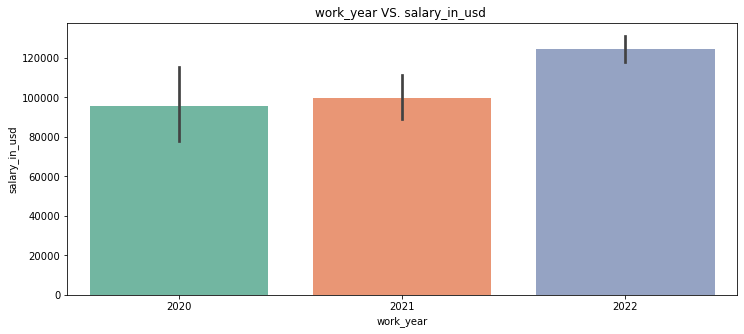

In [16]:
sns.barplot(data=df, x="work_year", y="salary_in_usd",palette="Set2")
plt.title("work_year VS. salary_in_usd ")

The graph shows that salaries increase with time, and there is a linear relationship between Time and Salaries

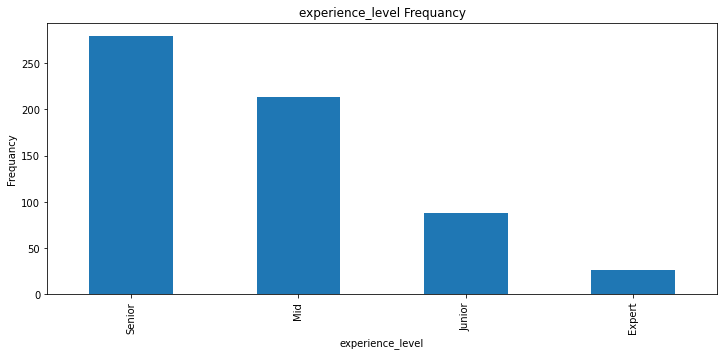

In [17]:
work_year_plot=df["experience_level"].value_counts().plot(kind="bar")
work_year_plot
plt.xlabel("experience_level")
plt.ylabel("Frequancy")
plt.title("experience_level Frequancy")
plt.show()

The graph shows the most experience level was for Senior level SE, and the least experience level was Executive-level EX

Text(0.5, 1.0, 'experience_level VS. salary_in_usd ')

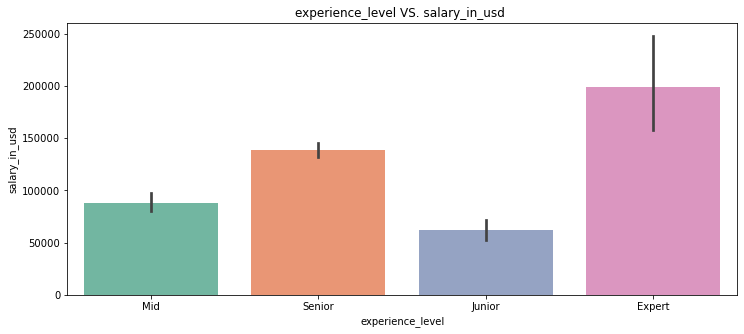

In [33]:
sns.barplot(data=df, x="experience_level", y="salary_in_usd",palette="Set2")
plt.title("experience_level VS. salary_in_usd ")

As the experiance level increase, salry increases 

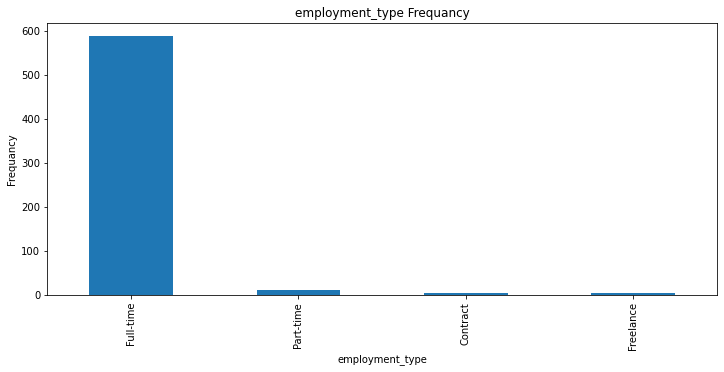

In [19]:
work_year_plot=df["employment_type"].value_counts().plot(kind="bar")
work_year_plot
plt.xlabel("employment_type")
plt.ylabel("Frequancy")
plt.title("employment_type Frequancy")
plt.show()

The graph shows that almost all employment types have a Full Time Job (FT). 

Text(0.5, 1.0, 'employment_type VS. salary_in_usd ')

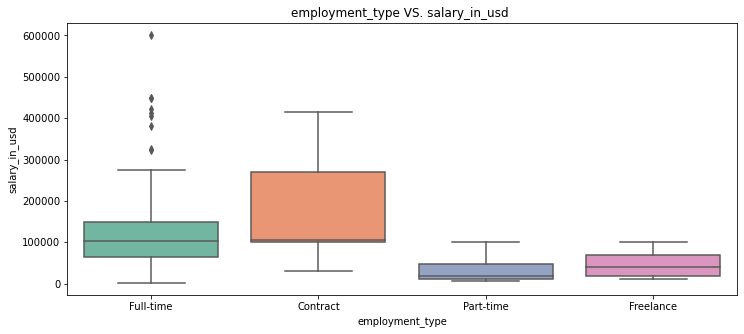

In [20]:
sns.boxplot(data=df, x="employment_type", y="salary_in_usd",palette="Set2")
plt.title("employment_type VS. salary_in_usd ")

PT Part-time FT Full-time CT Contract FL Freelance
 
The graph shows that CT has the maximum salary, and PT has the lowest salary

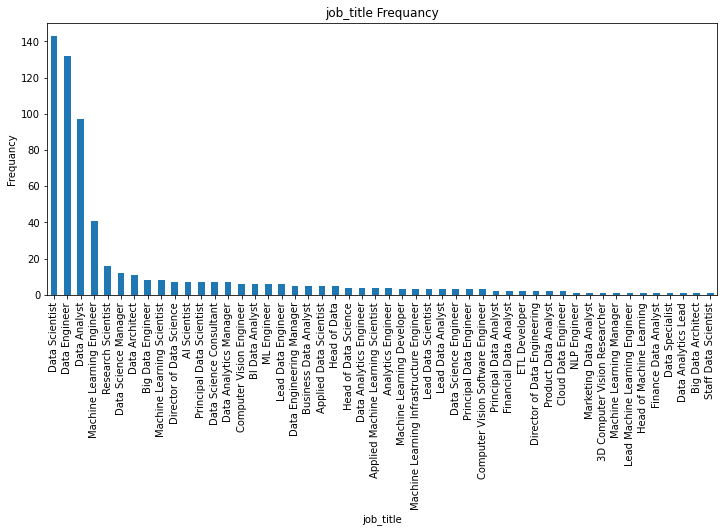

In [21]:
work_year_plot=df["job_title"].value_counts().plot(kind="bar")
work_year_plot
plt.xlabel("job_title")
plt.ylabel("Frequancy")
plt.title("job_title Frequancy")
plt.show()

The graph shows that Datasientist,Data Engineer, and Data Analyst roles have the most frequent

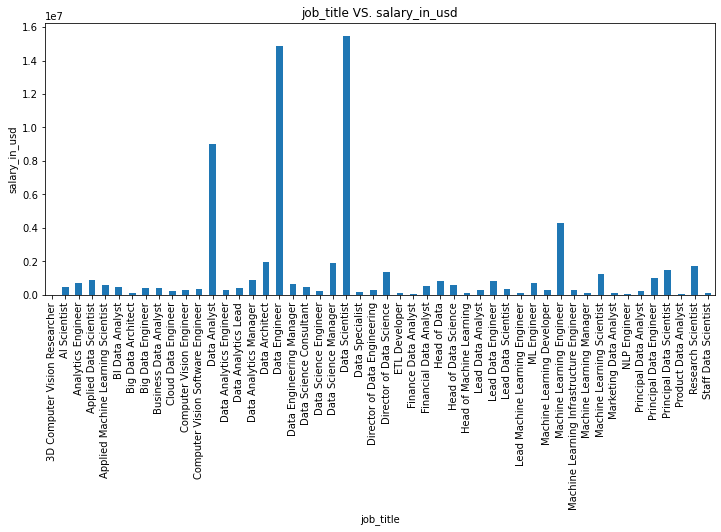

In [22]:
x=df.groupby("job_title")["salary_in_usd"].sum()
x.plot(kind="bar")
plt.xlabel("job_title")
plt.ylabel("salary_in_usd")
plt.title("job_title VS. salary_in_usd")
plt.show()

Data Scientist has the highst salary,and on the other hands 3D computer vision Researcher has the lowest price

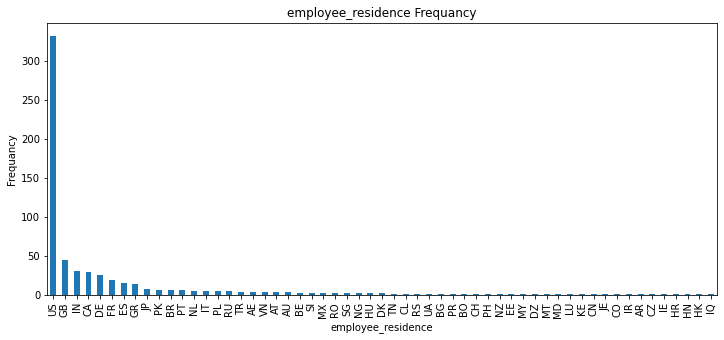

In [23]:
work_year_plot=df["employee_residence"].value_counts().plot(kind="bar")
work_year_plot
plt.xlabel("employee_residence")
plt.ylabel("Frequancy")
plt.title("employee_residence Frequancy")
plt.show()

The graph shows that most of the employee residence in USA

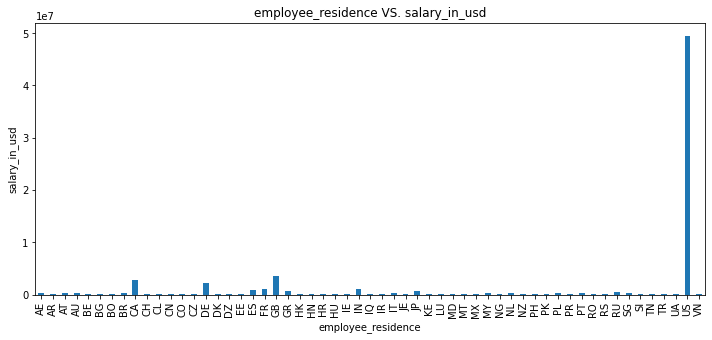

In [24]:
x=df.groupby("employee_residence")["salary_in_usd"].sum()
x.plot(kind="bar")
plt.xlabel("employee_residence")
plt.ylabel("salary_in_usd")
plt.title("employee_residence VS. salary_in_usd")
plt.show()

USA has maximum salary and Iran has the minimum

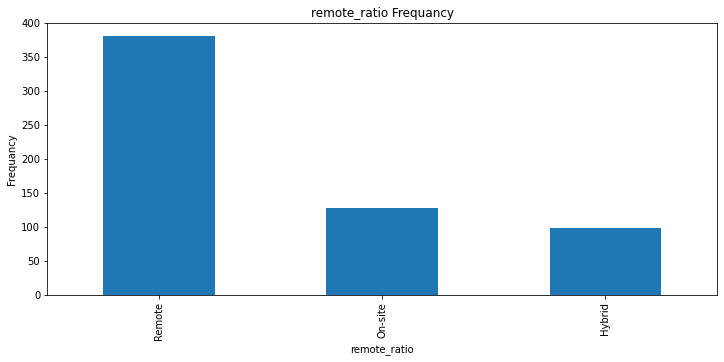

In [25]:
work_year_plot=df["remote_ratio"].value_counts().plot(kind="bar")
work_year_plot
plt.xlabel("remote_ratio")
plt.ylabel("Frequancy")
plt.title("remote_ratio Frequancy")
plt.show()

The graph shows that most of people work remotly 

Text(0.5, 1.0, 'remote_ratio VS. salary_in_usd ')

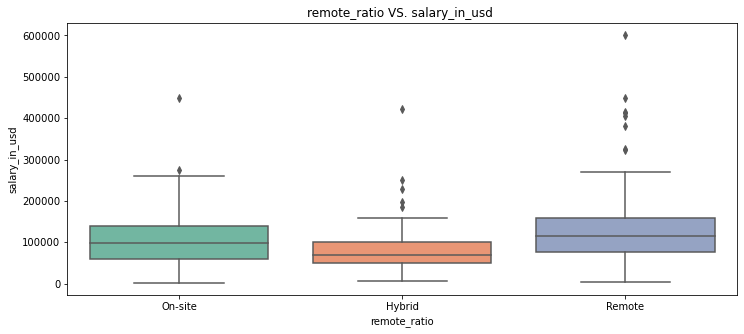

In [26]:
sns.boxplot(data=df, x="remote_ratio", y="salary_in_usd",palette="Set2")
plt.title("remote_ratio VS. salary_in_usd ")

There is no relationship between remote_ratio and salary

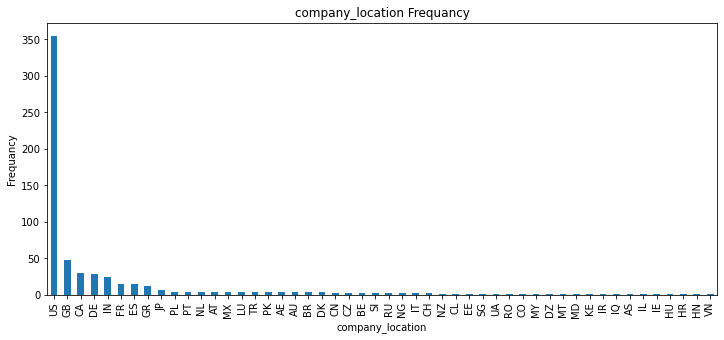

In [27]:
work_year_plot=df["company_location"].value_counts().plot(kind="bar")
work_year_plot
plt.xlabel("company_location")
plt.ylabel("Frequancy")
plt.title("company_location Frequancy")
plt.show()

The graph shows that most of companies are located in USA

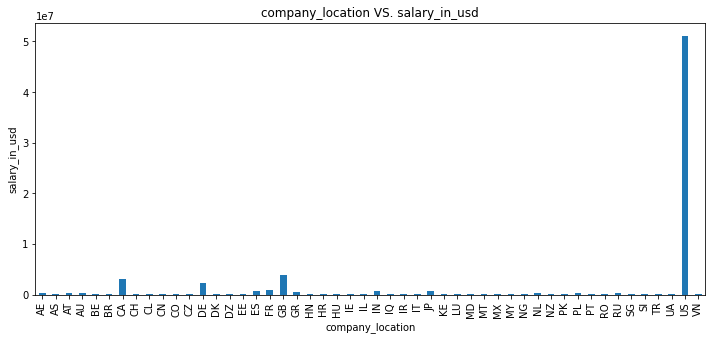

In [28]:
x=df.groupby("company_location")["salary_in_usd"].sum()
x.plot(kind="bar")
plt.xlabel("company_location")
plt.ylabel("salary_in_usd")
plt.title("company_location VS. salary_in_usd")
plt.show()

USA has maximum salary and Iran has the minimum

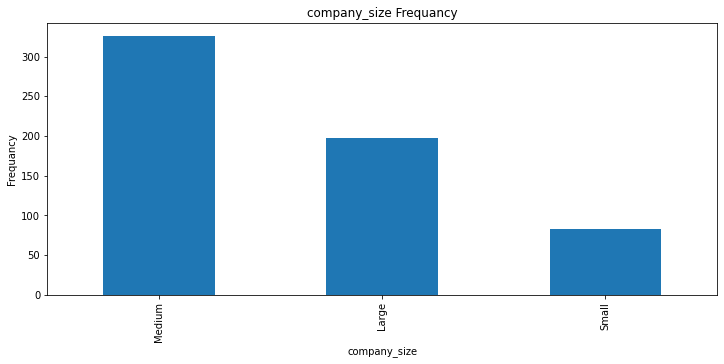

In [29]:
work_year_plot=df["company_size"].value_counts().plot(kind="bar")
work_year_plot
plt.xlabel("company_size")
plt.ylabel("Frequancy")
plt.title("company_size Frequancy")
plt.show()

The graph shows that most companies size are mediam that contains 50 to 250 employee

Text(0.5, 1.0, 'company_size VS. salary_in_usd ')

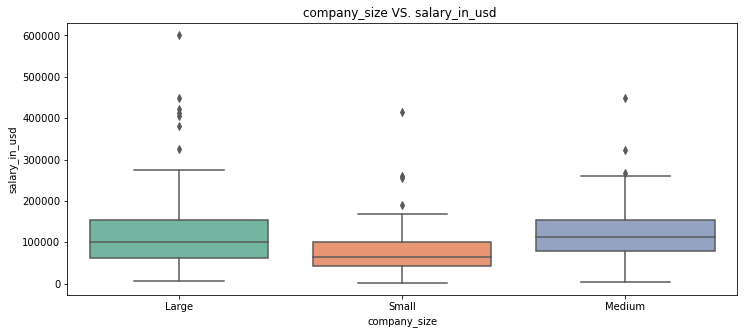

In [30]:
sns.boxplot(data=df, x="company_size", y="salary_in_usd",palette="Set2")
plt.title("company_size VS. salary_in_usd ")

There is no relationship between company size and salary

___

# Conclusion

-Data science jobs are getting more popular.

-If an employee wants to get the highest salary possible, United States should be their choice. 

-Large and mid-size companies are providing more salaries compared to small ones.

-Remote jobs are more popular and also pay the most. 

-Salary increase becomes drastic once you have gained a senior-level experience.

-Contract and full-time employments are way to go for 2022.

-Data Engineers, Data Scientists, and Machine Learning Engineers are the most valuable titles.

-The majority of the data is based in the United States. Since the United States pays much higher wages than other countries.
